# Desafio - Titanic

# Sumário
1. [1 - Business Understanding - Compreensão do Negócio](#1---business-understanding---compreensao-do-negocio)
2. [2 - Data Understanding - Compreensão dos Dados](#2---data-understanding---compreensao-dos-dados)
3. [3 - Data Preparation - Preparação dos Dados](#3---data-preparation---preparacao-dos-dados)
4. [4 - Modeling - Modelagem](#4---modeling---modelagem)
5. [5 - Evaluation - Avaliacao](#5---evaluation---avaliacao)
6. [6 - Deployment - Implantacao](#6---deployment---implanacao)
ação)


# 1 - Business Understanding - Compreensao do Negocio

O naufrágio do Titanic é um dos naufrágios mais infames da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas tinham maior probabilidade de sobreviver do que outros.

Neste desafio, pedimos que você construa um modelo preditivo que responda à pergunta: "que tipo de pessoas tinham maior probabilidade de sobreviver?" usando dados de passageiros (ou seja, nome, idade, sexo, classe socioeconômica, etc.).

# 2 - Data Understanding - Compreensao dos Dados

In [16]:
#Importar as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#ler os arquivos
titanic = pd.read_csv(r'C:\Users\robson.CBSC\Documents\03 Python\titanic.csv')

In [3]:
#mostrar as primeiras 5 linhas do DataFrame
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
#dar um resumo das analises estatisticas basicas
print (titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
#resumo das colunas, mostrando o tipo de dado e se existem valores nulos.
print (titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
#dar a contagem dos valores nulos em cada coluna.
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
#ver as linhas da coluna Age que estãso vazias
titanic[titanic.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


# 3 - Data Preparation - Preparacao dos Dados

In [8]:
#preencher valores ausentes na coluna Age com a mediana
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [9]:
#preencher valores ausentes na coluna Embarked com a moda
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [10]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [11]:
#remover coluna
titanic.drop('Cabin', axis=1, inplace=True)

In [12]:
print(titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [13]:
# Transformar variáveis categóricas em numéricas
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})  # 0 para homens e 1 para mulheres

In [14]:
# Criar variáveis dummies para a coluna 'Embarked'
titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)

In [15]:
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False        True  
4            373450  

# 4 - Modeling - Modelagem

In [17]:
# Excluir colunas que não são relevantes para a análise
X = titanic.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)  # Excluindo 'Survived' (alvo), 'PassengerId', 'Name' e 'Ticket'
y = titanic['Survived']  # Coluna alvo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Dividindo os dados em conjunto de treino e teste

In [18]:
#Instanciar o modelo de Regressão Logística
model = LogisticRegression(max_iter=200)

In [20]:
## Treinar o modelo
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [22]:
# Fazer previsões no conjunto de validação
y_pred = model.predict(X_test)

# 5 - Evaluation - Avaliacao

In [ ]:
# Fazer previsões no conjunto de validação
y_pred_val = logreg.predict(X_val_split)

In [24]:
# Avaliar o desempenho
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [25]:
print('Acurácia - Regressão Logística:', accuracy)
print('Matriz de Confusão:\n', conf_matrix)

Acurácia - Regressão Logística: 0.8100558659217877
Matriz de Confusão:
 [[90 15]
 [19 55]]


In [32]:
# Relatório de classificação (inclui precisão, revocação e F1-score)
print('\nRelatório de Classificação:\n', classification_report(y_test, y_pred))


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# 6 - Deployment - Implantacao

In [27]:
# Fazer previsões no conjunto de teste
y_pred_test = model.predict(X_test)

In [28]:
# Exibir as previsões
print(y_pred_test[:10])  # Exibe as 10 primeiras previsões

[0 0 0 1 1 1 1 0 1 1]


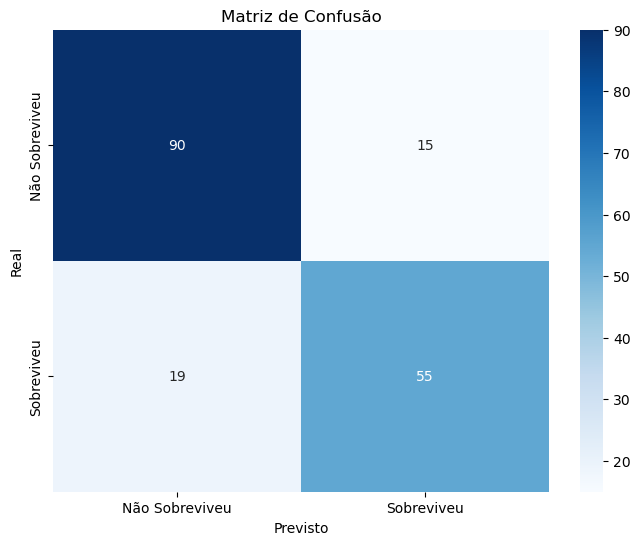

In [33]:
# Visualizar a Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Não Sobreviveu', 'Sobreviveu'], 
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')
plt.show()